In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('crime.csv')
print(df.info())
print(df.head(),end="\n\n")
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33116 entries, 0 to 33115
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       33116 non-null  object 
 1   Latitude   33116 non-null  float64
 2   Longitude  33116 non-null  float64
 3   Magnitude  33116 non-null  object 
dtypes: float64(2), object(2)
memory usage: 1.0+ MB
None
                       Date   Latitude  Longitude Magnitude
0  2017-02-06T20:11:14.000Z  38.894376 -76.997556         4
1  2017-06-03T12:54:27.000Z  38.906838 -77.058661         6
2  2017-04-07T00:00:00.000Z  38.960739 -77.018034        16
3  2017-05-31T11:39:56.000Z  38.905151 -77.063998         4
4  2017-07-30T00:00:00.000Z  38.949532 -77.020246        16

                           Date   Latitude  Longitude Magnitude
33111  2017-12-23T17:15:25.000Z  38.918640 -77.031953         4
33112  2017-12-30T06:13:28.000Z  38.927417 -77.021727         6
33113  2017-12-30T16:07:46.000Z  38.919739

In [3]:
df.drop(labels='Date',axis=1,inplace=True)
#df=df.iloc[:1000,:]
df

,Latitude,Longitude,Magnitude
0,38.894376,-76.997556,4
1,38.906838,-77.058661,6
2,38.960739,-77.018034,16
3,38.905151,-77.063998,4
4,38.949532,-77.020246,16
...,...,...,...
33111,38.918640,-77.031953,4
33112,38.927417,-77.021727,6
33113,38.919739,-77.033395,4
33114,38.937766,-76.974186,4


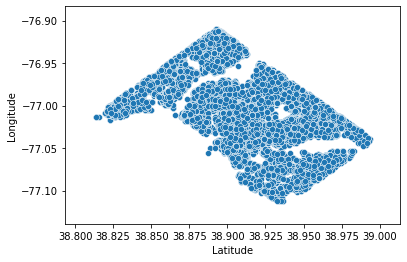

In [4]:
sns.scatterplot(x='Latitude',y='Longitude',data=df)

In [5]:
arr = np.unique(df.iloc[:,-1])
print(arr)

#removing strings containing alphabets from the dataset 
#and converting the strings with all numbers into integer

for i in range(df.shape[0]-1):
    if df.iloc[i,-1].isnumeric()==False:
        df.iloc[i,-1]='0'

arr = np.unique(df.iloc[:,-1])
print(arr)

# df=np.delete(df,ls,axis=0)
        
print(df.describe())
df.iloc[:,-1]=df.iloc[:,-1].astype(int) 
df=np.array(df)



# ls = [i.split(',') for i in df[:,3]]
# print(ls)
# nls = [int(''.join(i)) for i in ls]

['10' '12' '14' '16' '2' '4' '6' '8' 'ARSON']
['0' '10' '12' '14' '16' '2' '4' '6' '8']
           Latitude     Longitude
count  33116.000000  33116.000000
mean      38.906466    -77.006997
std        0.030238      0.036320
min       38.813471    -77.112316
25%       38.892672    -77.031115
50%       38.906062    -77.010676
75%       38.924144    -76.984549
max       38.993560    -76.910021


In [6]:
from random import uniform
from random import seed
import math

seed(5)

def randomCentroid(df,k):
    centroid=[]
    while(len(centroid)<k):
        r=[]
        for i in range(df.shape[1]-1):
            r.append(uniform(np.min(df[:,i]),np.max(df[:,i])))
        if r not in centroid:
            centroid.append(r)
    return centroid


def FindDistance(r1,r2):
    return np.sum((r1-r2)**2)


def group_data(df,k,centroid):
    groups={i:list() for i in np.arange(k)}
    for r in range(df.shape[0]):
        label=None
        min_dis=None
        for c in range(len(centroid)):
            cen = np.array(centroid[c])
            dis = FindDistance(df[r,:2],cen)
            if min_dis is None or min_dis>dis:
                min_dis=dis
                label=c
        groups[label].append(df[r,:2])
    return groups


def KMeans(df,k):
    cen=randomCentroid(df,k) #centroids
    print(cen)
    grps=group_data(df,k,cen)   
    ncen=[] #new centroids
    for key in grps.keys():
        arr = np.array(grps[key])
        #print(arr)
        if arr.size!=0:
            ls = list(np.mean(arr,axis=0))
            ncen.append(ls)
        
    while ncen!=cen:
        cen=ncen
        ncen=list()
        grps=group_data(df,k,cen)
        for key in grps.keys():
            arr = np.array(grps[key])
            if arr.size!=0:
                ls = list(np.mean(arr,axis=0))
                ncen.append(ls)
            
    return grps,cen

def CalWCSS(group,centroid):
    wcss=0
    #print(centroid[0])
    #print(len(group))
    for key in group.keys():
        r1=np.array(centroid[key])
        print(len(group[key]))
        val=0
        for i in range(len(group[key])):
            r2=np.array(group[key][i])
            #print(r2)
            val+= FindDistance(r1,r2)
        wcss+=val
    return wcss

def plotWCSS(wcss,k):
    
    plt.plot(range(1,k),wcss)
    plt.xlabel('value of k')
    plt.ylabel('within cluster sum of squares')


[[38.925648431152624, -76.96225598372807], [38.95667634349835, -76.92166261253105], [38.94671831052925, -76.92573387654642], [38.81869406681731, -77.01812290938723], [38.98335893309171, -76.98103156338928]]
10351
3856
4617
14292
0


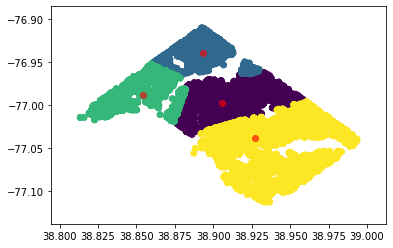

In [7]:
k=5
grps,centroid = KMeans(df,k)
x=[]
y=[]
z=[]
for key,ls in grps.items():
    print(len(ls))
    for i in range(len(ls)):
        x.append(ls[i][0])
        y.append(ls[i][1])
        z.append(key)
    
    
x=np.array(x)
y=np.array(y)
z=np.array(z)

#print(centroid)

plt.scatter(x,y,c=z)
for i in range(len(centroid)):
    xc=(centroid[i][0])
    yc=(centroid[i][1])
    plt.scatter(xc,yc,c='red',alpha=0.6)

In [8]:
#centroid_initial = [[38.9212767218451, -76.95886753276966], [38.948294625977624, -76.92665458160266], [38.93962355661563, -76.92988534133134], [38.828145004507235, -77.00320084372761]]